# Dataset
딥러닝은 크게 데이터 준비, 모델 구축, 모델 학습, 모델 평가로 구성됩니다.<br>
이번시간에는 첫 번째 단계인 <U>**`데이터셋` 을 구성하고 학습을 위해 가공하는 과정**</U>에 대해 공부해보도록 하겠습니다.<br>

## 0. 데이터셋 다운받기

**<span style="color:red">※ 이번실습에서는 1번~4번까지의 과정을 수행하지 않으셔도 됩니다. (스마트리드 첨부자료 사용)<br> 향후 과제를 진행하실 때 참고하시기 바랍니다.</span>**

### [데이터셋 다운]
1. https://www.kaggle.com/jessicali9530/caltech256/version/2 <br>
페이지 상단에 있는 `Download(1 GB)`버튼 누르기
<img src='https://user-images.githubusercontent.com/46768752/138972510-22507274-7013-49b1-9c3c-0557abce64ee.png' alt='다운로드 버튼' width='500'>

2. 로그인 후, 다시 버튼눌러서 데이터셋 다운받기
3. 다운받아진 `archive.zip` 파일 압축 풀기
4. `256_ObjectCategories` 폴더에 들어가서 200여개의 카테고리와 해당 이미지가 들어있는 것 확인해보기

### [colab 사용]
5. colab 런타임 유형 변경하기
    - 왼쪽 상단에 `런타임` 버튼 누르기 -> `런타임 유형 변경` 버튼 누르기 -> None을 GPU로 바꾸기<br>

6. bathtub, bear, beer-mug 카테고리의 이미지 사용하여 진행 <br>
   세 폴더에서 마음에 드는 사진 10장씩 골라 colab에 이미지 업로드하기
    - 1) colab 왼쪽 bar에서 폴더아이콘 누르기 <br>
    - 2) 마우스 우클릭 --> 새 폴더 --> 'data' 라는 폴더 만들기 <br>
    - 3) 만들어진 data 폴더에 마우스 갖다놓고 2번과 동일한 방법으로 train 폴더 만들기
    - 4) 동일한 방법으로 train 폴더 안에 bathtub, bear, beer-mug 폴더 만들기
    - 5) 마음에 드는 사진 10장 골라서 각 클래스 폴더 안에 넣기 <br>
    (사진 선택해서 해당 폴더에 드래그 하면 업로드 할 수 있습니다.)
    
위 과정을 모두 완료 한다면 데이터셋은 다음과 같은 형태로 구성됩니다.

<p align="center"><img src='https://user-images.githubusercontent.com/46768752/138975455-2fee8a3a-8a60-4e42-81e0-002911ebf621.png' alt='데이터셋 구성' /></p>


## 1. 데이터셋 구성하기

**데이터셋 구성 과정**은 다음과 같습니다. <br>
> 1) 데이터셋이 저장되어 있는 경로를 파악합니다. <br>
> 2) 데이터 이름(name)과 클래스(class), 그리고 학습을 위해 클래스(class)를 숫자로 나타낸 타겟(target)을 csv 파일에 저장합니다.


- 우선, 필요한 module을 import 해줍니다.

In [1]:
# 사용할 데이터 준비하기
# https://www.kaggle.com/jessicali9530/caltech256/version/2
import os
from glob import glob

import pandas as pd

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import pandas as pd

현재 데이터는 다음과 같은 형태로 file과 directory가 구성되어 있습니다.

```
./data/train/bathtub/xxx.jpg
./data/train/bathtub/xxx.jpg

./data/train/bear/xxx.jpg
./data/train/bear/xxx.jpg

./data/train/beer-mug/xxx.jpg
./data/train/beer-mug/xxx.jpg
```

- 각 클래스(backpack, butterfly, coin)별로 디렉토리가 따로 구성되어 있음을 알 수 있습니다.
- `glob`를 통해 파일경로를 리스트로 받아옵니다.

In [3]:
file_path = './data/train1/*/*.jpg'

file_list = glob(file_path)
file_list

['./data/train1\\face\\001_0001.jpg',
 './data/train1\\face\\001_0002.jpg',
 './data/train1\\face\\001_0003.jpg',
 './data/train1\\face\\001_0004.jpg',
 './data/train1\\face\\001_0005.jpg',
 './data/train1\\face\\001_0006.jpg',
 './data/train1\\face\\001_0007.jpg',
 './data/train1\\face\\001_0008.jpg',
 './data/train1\\face\\001_0009.jpg',
 './data/train1\\face\\001_0010.jpg',
 './data/train1\\face\\001_0011.jpg',
 './data/train1\\face\\001_0012.jpg',
 './data/train1\\face\\001_0013.jpg',
 './data/train1\\face\\001_0014.jpg',
 './data/train1\\face\\001_0015.jpg',
 './data/train1\\face\\001_0017.jpg',
 './data/train1\\face\\001_0018.jpg',
 './data/train1\\face\\001_0019.jpg',
 './data/train1\\face\\001_0020.jpg',
 './data/train1\\face\\001_0021.jpg',
 './data/train1\\face\\001_0022.jpg',
 './data/train1\\face\\001_0023.jpg',
 './data/train1\\face\\001_0024.jpg',
 './data/train1\\face\\001_0025.jpg',
 './data/train1\\face\\001_0026.jpg',
 './data/train1\\face\\001_0027.jpg',
 './data/tra

In [4]:
import cv2
import glob

file_path = './data/train1/*/*.jpg'
file_list = glob.glob(file_path)

for file in file_list:
    image = cv2.imread(file)
    shape = image.shape
    print(f"File: {file}, Shape: {shape}")

File: ./data/train1\face\001_0001.jpg, Shape: (1171, 937, 3)
File: ./data/train1\face\001_0002.jpg, Shape: (1189, 980, 3)
File: ./data/train1\face\001_0003.jpg, Shape: (725, 580, 3)
File: ./data/train1\face\001_0004.jpg, Shape: (960, 720, 3)
File: ./data/train1\face\001_0005.jpg, Shape: (750, 600, 3)
File: ./data/train1\face\001_0006.jpg, Shape: (545, 450, 3)
File: ./data/train1\face\001_0007.jpg, Shape: (472, 354, 3)
File: ./data/train1\face\001_0008.jpg, Shape: (531, 413, 3)
File: ./data/train1\face\001_0009.jpg, Shape: (709, 531, 3)
File: ./data/train1\face\001_0010.jpg, Shape: (291, 236, 3)
File: ./data/train1\face\001_0011.jpg, Shape: (295, 236, 3)
File: ./data/train1\face\001_0012.jpg, Shape: (294, 235, 3)
File: ./data/train1\face\001_0013.jpg, Shape: (338, 266, 3)
File: ./data/train1\face\001_0014.jpg, Shape: (1008, 720, 3)
File: ./data/train1\face\001_0015.jpg, Shape: (969, 720, 3)
File: ./data/train1\face\001_0017.jpg, Shape: (1061, 849, 3)
File: ./data/train1\face\001_0018.jp

- 해당 클래스를 학습에서 사용하기 위해 bathtub는 0으로, bear는 1로, 마지막으로 beer-mug는 3으로 설정하여 `target`이라는 항목에 저장합니다.
- 데이터 이름과 클래스, 타겟을 `pd.DataFrame`을 통해 dataframe으로 구성한 후 `csv`파일로 만들어줍니다.

In [5]:
data_dict = {'image_name':[], 'class':[], 'target':[], 'file_path':[]}
target_dict = {'face':0, 'face_cha':1}

for path in file_list:

    data_dict['file_path'].append(path) # file_path 항목에 파일 경로 저장

    path_list = path.split(os.path.sep) # os별 파일 경로 구분 문자로 split
    print(path_list)

    data_dict['image_name'].append(path_list[-1])
    data_dict['class'].append(path_list[-2])
    data_dict['target'].append(target_dict[path_list[-2]])

train_df = pd.DataFrame(data_dict)
print('\n<data frame>\n', train_df)

train_df.to_csv("./data/train.csv", mode='w')

['./data/train1', 'face', '001_0001.jpg']
['./data/train1', 'face', '001_0002.jpg']
['./data/train1', 'face', '001_0003.jpg']
['./data/train1', 'face', '001_0004.jpg']
['./data/train1', 'face', '001_0005.jpg']
['./data/train1', 'face', '001_0006.jpg']
['./data/train1', 'face', '001_0007.jpg']
['./data/train1', 'face', '001_0008.jpg']
['./data/train1', 'face', '001_0009.jpg']
['./data/train1', 'face', '001_0010.jpg']
['./data/train1', 'face', '001_0011.jpg']
['./data/train1', 'face', '001_0012.jpg']
['./data/train1', 'face', '001_0013.jpg']
['./data/train1', 'face', '001_0014.jpg']
['./data/train1', 'face', '001_0015.jpg']
['./data/train1', 'face', '001_0017.jpg']
['./data/train1', 'face', '001_0018.jpg']
['./data/train1', 'face', '001_0019.jpg']
['./data/train1', 'face', '001_0020.jpg']
['./data/train1', 'face', '001_0021.jpg']
['./data/train1', 'face', '001_0022.jpg']
['./data/train1', 'face', '001_0023.jpg']
['./data/train1', 'face', '001_0024.jpg']
['./data/train1', 'face', '001_002

## 2. 데이터셋 불러오기

- `1.데이터셋 구성하기` 에서 저장했던 `train.csv` 파일을 통해 데이터셋을 불러옵니다.
- `scikit learn의 train_test_split`를 사용하여 데이터셋을 train, validation, test로 나눠줍니다.


In [6]:
from sklearn.model_selection import train_test_split

def get_df():

    # cvs 파일 읽어서 DataFrame으로 저장
    df = pd.read_csv('./data/train.csv')

    # 데이터셋을 train, val, test로 나누기
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=2359)
    df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=2359)

    return df_train, df_val, df_test

In [7]:
# 데이터셋 읽어오기
df_train, df_val, df_test = get_df()
print(len(df_train), len(df_val), len(df_test))

164 42 52


## 3. 학습시, 데이터셋을 사용할 수 있도록 만들기

### 3-1. Dataset Class
- pytorch가 dataset을 어떻게 읽을지 알려주는 class입니다.
- `__len__`과 `__getitem__` 부분은 필수적으로 필요한 method입니다.


```python
class 내가만든_데이터셋(Dataset):
    def __init__(self, csv, mode, meta_features, transform=None):
        # 데이터셋 초기화
    def __len__(self):
        # 데이터셋 크기 리턴
        return self.csv.shape[0]
    def __getitem__(self, index):
        # 인덱스에 해당하는 이미지 리턴
    return data, torch.tensor(self.csv.iloc[index].target).long()

```

In [8]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class Classification_Dataset(Dataset):
    def __init__(self, csv, mode, transform=None):
        self.csv = csv.reset_index(drop=True)  # random으로 섞인 데이터의 인덱스를 reset 시켜서 다시 부여한다.
        self.transform = transform

    def __len__(self):
        return self.csv.shape[0]  # csv 파일의 행 개수 == 데이터 개수

    def __getitem__(self, index):
        row = self.csv.iloc[index]                       # 주어진 index에 대한 데이터 뽑아오기
        image = Image.open(row.file_path).convert('RGB') # 파일경로로 부터 이미지를 읽고 rgb로 변환하기
        target = torch.tensor(self.csv.iloc[index].target).long()

        if self.transform:
            image = self.transform(image) # 이미지에 transform 적용하기

        return image, target  # 이미지와 target return하기

- `csv.reset_index(drop=True)` 는 아래 결과를 통해 역할을 알 수 있습니다.

In [9]:
df_train

,Unnamed: 0,image_name,class,target,file_path
93,93,002_0094.jpg,character,1,./data/train1\character\002_0094.jpg
36,36,002_0037.jpg,character,1,./data/train1\character\002_0037.jpg
83,83,002_0084.jpg,character,1,./data/train1\character\002_0084.jpg
121,121,002_0122.jpg,character,1,./data/train1\character\002_0122.jpg
168,168,001_0044.jpg,face,0,./data/train1\face\001_0044.jpg
...,...,...,...,...,...
40,40,002_0041.jpg,character,1,./data/train1\character\002_0041.jpg
71,71,002_0072.jpg,character,1,./data/train1\character\002_0072.jpg
14,14,002_0015.jpg,character,1,./data/train1\character\002_0015.jpg
208,208,001_0084.jpg,face,0,./data/train1\face\001_0084.jpg


In [10]:
df_train.reset_index(drop=True)

,Unnamed: 0,image_name,class,target,file_path
0,93,002_0094.jpg,character,1,./data/train1\character\002_0094.jpg
1,36,002_0037.jpg,character,1,./data/train1\character\002_0037.jpg
2,83,002_0084.jpg,character,1,./data/train1\character\002_0084.jpg
3,121,002_0122.jpg,character,1,./data/train1\character\002_0122.jpg
4,168,001_0044.jpg,face,0,./data/train1\face\001_0044.jpg
...,...,...,...,...,...
158,40,002_0041.jpg,character,1,./data/train1\character\002_0041.jpg
159,71,002_0072.jpg,character,1,./data/train1\character\002_0072.jpg
160,14,002_0015.jpg,character,1,./data/train1\character\002_0015.jpg
161,208,001_0084.jpg,face,0,./data/train1\face\001_0084.jpg


- `Classification_Dataset`에서 `__len__`과 `__getitem__`의 결과를 확인해보겠습니다.

In [9]:
from torchvision import transforms
dataset_train = Classification_Dataset(df_train, 'train', transform=transforms.ToTensor())

print(f'>> 데이터 셋 전체 크기, 개수, sample개수 : {dataset_train.__len__()}')
print(f'>> i번째 데이터 불러오기 : dataset_train.__getitem__(i)')
print(f'>> 0번째 데이터 불러와지는 형태 : tuple (이미지 픽셀값, target)\n : {dataset_train.__getitem__(0)}')

>> 데이터 셋 전체 크기, 개수, sample개수 : 164
>> i번째 데이터 불러오기 : dataset_train.__getitem__(i)
>> 0번째 데이터 불러와지는 형태 : tuple (이미지 픽셀값, target)
 : (tensor([[[0.2039, 0.2039, 0.2078,  ..., 0.2039, 0.2039, 0.2039],
         [0.2039, 0.2039, 0.2078,  ..., 0.2039, 0.2039, 0.2039],
         [0.2039, 0.2039, 0.2078,  ..., 0.2078, 0.2078, 0.2078],
         ...,
         [0.0745, 0.0824, 0.0706,  ..., 0.0235, 0.0078, 0.0000],
         [0.0667, 0.0706, 0.0627,  ..., 0.0196, 0.0039, 0.0000],
         [0.0667, 0.0706, 0.0627,  ..., 0.0196, 0.0039, 0.0000]],

        [[0.3020, 0.3020, 0.3059,  ..., 0.2980, 0.2980, 0.2980],
         [0.3020, 0.3020, 0.3059,  ..., 0.2980, 0.2980, 0.2980],
         [0.3020, 0.3020, 0.3059,  ..., 0.3020, 0.3020, 0.3020],
         ...,
         [0.0627, 0.0706, 0.0588,  ..., 0.0118, 0.0039, 0.0000],
         [0.0549, 0.0588, 0.0510,  ..., 0.0078, 0.0000, 0.0000],
         [0.0549, 0.0588, 0.0510,  ..., 0.0078, 0.0000, 0.0000]],

        [[0.4235, 0.4235, 0.4275,  ..., 0.4314, 0.4314, 

### 3-2. Transforms & Augmentation
#### [Transforms]
- 구축한 데이터셋에서 이미지 파일은 서로 크기가 다를 수 있기 때문에, <U>같은 크기</U>로 맞춰주어야 합니다.
    - `transforms.Normalize([r채널의 mean, g채널의 mean, b채널의 mean], [r채널의 std, g채널의 std, b채널의 std])` : normalize
    - `transforms.Resize()` : 크기 변경
    - `transforms.CenterCrop()`, `transforms.RandomResizedCrop()` : 잘라내기

- 예시
```python
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                               ])
```
- `transforms.Normalize()`는 이미지의 픽셀값을 정규화하는 과정입니다. <br>
본 과정을 수행해야 원활하게 학습이 이루어지게 됩니다.
3개의 채널로 구성되어 있는 이미지의 경우 아래와 같이 normalize 됩니다.

    - `input[channel] = (input[channel] - mean[channel]) / std[channel]`
    - 입력 픽셀값에 mean을 빼주게 되면 픽셀값이 0을 중심으로 두게 변형되고, std를 나누면 픽셀값이 -1과 1 사이로 분포를 이루게 됩니다.
    - 채널별 mean, std를 구하는 방법은 아래에 나와있습니다.




#### [Augmentation]
- 일반적으로 데이터의 양이 많을수록 좋은 성능을 갖기 때문에, 데이터를 random하게 변경하여 새로운 데이터로 사용하여 학습 시 사용하는 <U>데이터의 양을 늘릴</U> 수 있습니다.
- 입력 이미지를 랜덤하게 변경함으로써 모델이 풀어야 할 문제(예:이미지 클래스 맞추기)를 더 어렵게 만들어 <U>overfitting을 방지</U>하는 데에도 도움이 됩니다.
- https://pytorch.org/vision/stable/transforms.html 에서 더 많은 예시를 보실 수 있습니다.
- 예시
    - `transforms.RandomRotation` : 랜덤하게 회전하기
    - `transforms.RandomHorizontalFlip()` : 랜덤하게 수평으로 뒤집기

In [10]:
# normalize를 위해 rgb 채널의 mean, std 값 구하기

import numpy as np

dataset_train = Classification_Dataset(df_train, 'train', transform=transforms.ToTensor())

# 데이터(shape:torch.Size([3, 381, 343])) rgb에 대한 mean, std 구하기
rgb_mean = [np.mean(x.numpy(), axis=(1,2)) for x,_ in dataset_train]
rgb_std = [np.std(x.numpy(), axis=(1,2)) for x,_ in dataset_train]


# 각 데이터 채널별로 mean, std 나타내기
c_mean = []
c_std = []
for i in range(3):
    c_mean.append(np.mean([m[i] for m in rgb_mean]))
    c_std.append(np.std([s[i] for s in rgb_std]))

print(f'rgb mean: {c_mean}\nrgb std: {c_std}')

rgb mean: [0.60065126, 0.5877309, 0.56868696]
rgb std: [0.05771285, 0.059666246, 0.058321495]


In [11]:
from torchvision import transforms

def get_transforms(image_size):

    transforms_train = transforms.Compose([
                                       transforms.Resize(256),
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(image_size),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()
                                       # transforms.Normalize([0.5438486, 0.51331395, 0.4501529],
                                                            # [0.07585379, 0.07164218, 0.08385534])
        ])

    transforms_val = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(image_size),
                                      transforms.ToTensor(),
                                      # transforms.Normalize([0.5438486, 0.51331395, 0.4501529],
                                      #                       [0.07585379, 0.07164218, 0.08385534])])
                                        ])
    return transforms_train, transforms_val

In [12]:
# 모델 트랜스폼 가져오기
transforms_train, transforms_val = get_transforms(256)

In [13]:
# dataset class 객체 만들기
dataset_train = Classification_Dataset(df_train, 'train', transform=transforms_train)
dataset_val = Classification_Dataset(df_val, 'valid', transform=transforms_val)

### 3-3. Data Loaders
- `DataLoader`는 `Classification_Dataset`으로 받아온 데이터(이미지, target)를 **batch**로 묶어 return합니다.

In [14]:
from torch.utils.data.sampler import RandomSampler
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=4, sampler=RandomSampler(dataset_train), num_workers=0)
valid_loader = torch.utils.data.DataLoader(dataset_val, batch_size=4, num_workers=0)

- 해당 DataLoader는 generator로, 다음과 같이 데이터를 불러올 수 있습니다.

In [15]:
for images, targets in train_loader:
    print(f'[batch, channel, ...] : {images.shape}')
    print(targets.shape)

[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size([4, 3, 256, 256])
torch.Size([4])
[batch, channel, ...] : torch.Size

#### 데이터 준비 파트는 마무리가 되었습니다. 큰 틀을 살펴보면서 정리해보도록 하겠습니다.

- `0. 데이터셋 다운받기`: 여러분이 수집한 데이터의 클래스별로 폴더를 구성하여 데이터셋을 준비합니다.
- `1. 데이터셋 구성하기`: 저장한 데이터의 정보를 csv 파일로 만듭니다.
- `2. 데이터셋 불러오기`: csv 파일을 통해 데이터를 불러와서 train, validation, test로 나눠줍니다.
- `3. 학습 시, 데이터셋을 사용할 수 있도록 만들기`
    - `3-1. Dataset Class`: pytorch가 dataset을 어떻게 읽을지 알려주는 클래스를 만듭니다. (데이터셋 크기와 지정한 인덱스별로 데이터를 리턴해주는 len, getitem 함수가 포함되어 있습니다.)
    - `3-2. Transforms & Augmentation`: 학습을 위해 데이터를 가공합니다.
    - `3-3. Data Loaders`: 배치별로 데이터를 묶어줍니다. Training시, 배치단위별로 데이터가 호출됩니다.

___

# 4. Model

`VGG16` 모델을 transfer learning하는 방식으로 진행합니다. <br>
자세한 예는 https://pytorch.org/vision/stable/models.html 에 나와있습니다.

<img src='https://user-images.githubusercontent.com/46768752/138986562-1cbfcd9a-da6b-45e8-b4ae-3b2af0d2ae16.png'>

In [16]:
batch_size = 4
learning_rate = 0.0002
num_epoch = 5

In [17]:
class Autoencoder(nn.Module):
      def __init__(self):
          super(Autoencoder,self).__init__()
          self.encoder = nn.Linear(3*256*256, 64)
          self.decoder = nn.Linear(64,3*256*256)
      def forward(self,x):
          x=x.view(batch_size,-1)
          encoded = self.encoder(x)
          out = self.decoder(encoded).view(batch_size,3,256,256)

          return out

In [18]:
from torchvision import models
from collections import OrderedDict
import torch.nn as nn
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = Autoencoder().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
# model

cpu


In [19]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)

        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,x)
        loss.backward()
        optimizer.step()

    if j % 1000 == 0:
        print(loss)
        loss_arr.append(loss.cpu().data.numpy()[0])

In [40]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
print(out_img.shape)


torch.Size([4, 3, 256, 256])
torch.Size([4, 3, 256, 256])


In [ ]:
# class Encoder(nn.Module):
#     def __init__(self):
#         super(Encoder,self).__init__()
#         self.layer1 = nn.Sequential(
#                         nn.Conv2d(3,16,3,padding=1),
#                         nn.ReLU(),
#                         nn.BatchNorm2d(16),
#                         nn.Conv2d(16,32,3,padding=1),
#                         nn.ReLU(),
#                         nn.BatchNorm2d(32),
#                         nn.Conv2d(32,64,3,padding=1),
#                         nn.ReLU(),
#                         nn.BatchNorm2d(64),
#                         nn.MaxPool2d(2,2)
#         )
#         self.layer2 = nn.Sequential(
#                         nn.Conv2d(64,128,3,padding=1),
#                         nn.ReLU(),
#                         nn.BatchNorm2d(128),
#                         nn.MaxPool2d(2,2),
#                         nn.Conv2d(128,256,3,padding=1),
#                         nn.ReLU()
#         )


#     def forward(self,x):
#         out = self.layer1(x)
#         out = self.layer2(out)
#         out = out.view(batch_size, -1)
#         return out

# class Decoder(nn.Module):
#     def __init__(self):
#        super(Decoder,self).__init__()
#        self.layer1 = nn.Sequential(
#                         nn.ConvTranspose2d(256,128,3,2,1,1),
#                         nn.ReLU(),
#                         nn.BatchNorm2d(128),
#                         nn.ConvTranspose2d(128,64,3,1,1),
#                         nn.ReLU(),
#                         nn.BatchNorm2d(64)

#         )
#        self.layer2 = nn.Sequential(
#                         nn.ConvTranspose2d(64,16,3,1,1),
#                         nn.ReLU(),
#                         nn.BatchNorm2d(16),
#                         nn.ConvTranspose2d(16,1,3,2,1,1),
#                         nn.ReLU()
#                         )

#     def forward(self,x):
#         out = x.view(256,256,3,4)
#         out = self.layer1(out)
#         out = self.layer2(out)
#         return out



In [20]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # Adjust the size for the fully connected layer
        return out

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, 2, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 3, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64, 16, 3, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 3, 3, 2, 1, 1),
        )

    def forward(self, x):
        x = x.view(x.size(0), 256, 64, 64)  # Reverse the view operation from the Encoder
        out = self.layer1(x)
        out = self.layer2(out)
        return out


In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

encoder = Encoder().to(device)
decoder = Decoder().to(device)

# 인코더 디코더의 파라미터를 동시에 학습시키기 위해 이를 묶는 방법입니다.
parameters = list(encoder.parameters())+ list(decoder.parameters())

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

cpu


In [ ]:
# # Backprop을 수행하지 않도록 parameter들을 동결시키기
# # 재학습을 위해, 모든 parameters의 gradient를 꺼놓기
# for param in model.parameters():
#     param.requires_grad = False

# # 마지막 layer를 과제에 맞게 수정하기
# classifier = nn.Sequential(OrderedDict([
#                           ('fc1', nn.Linear(25088, 500)),
#                           ('relu', nn.ReLU()),
#                           ('fc2', nn.Linear(500, 250)),
#                           ('relu', nn.ReLU()),
#                           ('fc3', nn.Linear(250, 5))
#                           ]))

# model.classifier = classifier

# 5. Training

In [22]:
import numpy as np
import cv2
import random
import time
import torch.optim as optim

from tqdm import tqdm

## 3-1. Train

In [ ]:
# try:
#     encoder, decoder = torch.load('./model/conv_autoencoder.pkl')
#     print("\n--------model restored--------\n")
# except:
#     print("\n--------model not restored--------\n")
#     pass

# for i in range(num_epoch):
#     for j,[image,label] in enumerate(train_loader):
#        optimizer.zero_grad()
#        image = image.to(device)

#        output = encoder(image)
#        output = decoder(output)

#        loss = loss_func(output,image)
#        loss.backward()
#        optimizer.step()


#     if j % 10 == 0:
#         # 모델 저장하는 방법
#         # 이 역시 크게 두가지 방법이 있는데 여기 사용된 방법은 좀 단순한 방법입니다.
#         # https://pytorch.org/tutorials/beginner/saving_loading_models.html
#         torch.save([encoder,decoder],'./model/conv_autoencoder.pkl')
#         print(loss)


In [ ]:
# def train_epoch(model, loader, device, F, optimizer):

#     model.train()   # 모델 train 모드로 바꾸기
#     train_loss = []
#     bar = tqdm(loader)
#     for i, (data, target) in enumerate(bar):
        
#         optimizer.zero_grad()  # 최적화된 모든 변수 초기화
        
#         data, target = data.to(device), target.to(device)  # 지정한 device로 데이터 옮기기
#         logits = model(data)              # 1. forward pass
        
#         loss = criterion(logits, target)  # 2. loss 계산
#         loss.backward()                   # 3. backward pass

#         optimizer.step()                  # 4. gradient descent(파라미터 업데이트)

#         loss_np = loss.detach().cpu().numpy() # loss값 가져오기 위해 gpu에 있던 데이터 모두 cpu로 옮기기
#         train_loss.append(loss_np)
#         bar.set_description('loss: %.5f' % (loss_np))

#     train_loss = np.mean(train_loss)  # 한 epoch당 train loss의 평균 구하기
#     return train_loss

## 3-2. Validation

In [ ]:
# def val_epoch(model, loader, device, criterion):

#     model.eval()  # 모델 evaluate 모드로 바꾸기
#     val_loss = []
#     LOGITS = []
#     PROBS = []
#     TARGETS = []
#     with torch.no_grad():
#         for (data, target) in tqdm(loader):

#             data, target = data.to(device), target.to(device) # 지정한 device로 데이터 옮기기
#             logits = model(data) # 1. forward pass
#             probs = logits.softmax(1)  # 다중분류 -> 각 클래스일 확률을 전체 1로 두고 계산하기

#             LOGITS.append(logits.detach().cpu())
#             PROBS.append(probs.detach().cpu())
#             TARGETS.append(target.detach().cpu())

#             loss = criterion(logits, target) # 2. loss 계산
#             val_loss.append(loss.detach().cpu().numpy())

#     val_loss = np.mean(val_loss)
#     LOGITS = torch.cat(LOGITS).numpy()
#     PROBS = torch.cat(PROBS).numpy()
#     TARGETS = torch.cat(TARGETS).numpy()

#     # accuracy : 정확도
#     acc = (PROBS.argmax(1) == TARGETS).mean() * 100.

#     return val_loss, acc

## 3-3. 학습시키기

In [ ]:
np.sqrt(4096)

In [28]:

# def run(model, init_lr, n_epochs):

#     # gpu 사용
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#     # model을 지정한 장치로 옮기기
#     model = model.to(device)

#     # loss function 지정
#     criterion= nn.MSELoss()

#     # optimizer로 adam 사용
#     optimizer = optim.Adam(model.parameters(), lr=init_lr)

#     for epoch in range(1, n_epochs + 1):
#         print(time.ctime(), f'Epoch {epoch}')

#         train_loss = train_epoch(model, train_loader, device, criterion, optimizer) # train
#         val_loss, acc = val_epoch(model, valid_loader, device, criterion) # validation

#         content = time.ctime() + ' ' + f'Epoch {epoch}, lr: {optimizer.param_groups[0]["lr"]:.7f}, train loss: {train_loss:.5f}, valid loss: {(val_loss):.5f}, Acc: {(acc):.4f}.'
#         print(content)
#         train_loss1.append(train_loss)
#         val_loss1.append(val_loss)
#         acc1.append(acc)

#     torch.save(model.state_dict(), 'best_model.pth')


In [ ]:
# import time

# train_loss1 = []
# val_loss1 = []
# acc1 = []
# run(model, init_lr=1e-6, n_epochs=20)

In [23]:
train_loss1 = []
val_loss1 = []
# acc1 = []
num_epochs = 50
best_val_loss = float('inf')  # 초기값을 무한대로 설정

for epoch in range(num_epochs):
    # 훈련 루프
    encoder.train()
    decoder.train()
    train_loss = 0.0
    for data in tqdm(train_loader, desc=f'epoch {epoch + 1}/{num_epochs} (train)'):
        images, _ = data
        images = images.to(device)

       
        encoded = encoder(images)
        decoded = decoder(encoded)

        # 손실 계산
        loss = loss_func(decoded, images)

        # 역방향 전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # 검증 루프
    encoder.eval()
    decoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in tqdm(valid_loader, desc=f'epoch {epoch + 1}/{num_epochs} (valid)'):
            images, _ = data
            images = images.to(device)

            
            encoded = encoder(images)
            decoded = decoder(encoded)

            # 손실 계산
            val_loss += loss_func(decoded, images).item()

    # 평균 손실 계산
    train_loss /= len(train_loader)
    train_loss1.append(train_loss)
    val_loss /= len(valid_loader)
    val_loss1.append(val_loss) 
    # 각 에폭 이후 손실 출력
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # 현재 검증 손실이 이전 최고 손실보다 낮으면 모델 저장
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save({
            'encoder_state_dict': encoder.state_dict(),
            'decoder_state_dict': decoder.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': val_loss
        }, 'best_model.pth')
        print('model save.')

epoch 1/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.69it/s]


Epoch [1/50], Train Loss: 0.4966, Val Loss: 0.4301
model save.


epoch 2/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.66it/s]


Epoch [2/50], Train Loss: 0.3824, Val Loss: 0.3461
model save.


epoch 3/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.53it/s]


Epoch [3/50], Train Loss: 0.3518, Val Loss: 0.3340
model save.


epoch 4/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.15it/s]


Epoch [4/50], Train Loss: 0.3297, Val Loss: 0.2945
model save.


epoch 5/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.02it/s]


Epoch [5/50], Train Loss: 0.3080, Val Loss: 0.2832
model save.


epoch 6/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.06it/s]


Epoch [6/50], Train Loss: 0.2813, Val Loss: 0.2658
model save.


epoch 7/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.04it/s]


Epoch [7/50], Train Loss: 0.2420, Val Loss: 0.2388
model save.


epoch 8/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.11it/s]


Epoch [8/50], Train Loss: 0.2203, Val Loss: 0.1970
model save.


epoch 9/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.18it/s]


Epoch [9/50], Train Loss: 0.1747, Val Loss: 0.1608
model save.


epoch 10/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.95it/s]


Epoch [10/50], Train Loss: 0.1472, Val Loss: 0.1380
model save.


epoch 11/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.01it/s]


Epoch [11/50], Train Loss: 0.1194, Val Loss: 0.0992
model save.


epoch 12/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.04it/s]


Epoch [12/50], Train Loss: 0.0914, Val Loss: 0.0780
model save.


epoch 13/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.86it/s]


Epoch [13/50], Train Loss: 0.0737, Val Loss: 0.0586
model save.


epoch 14/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.99it/s]


Epoch [14/50], Train Loss: 0.0550, Val Loss: 0.0455
model save.


epoch 15/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.01it/s]


Epoch [15/50], Train Loss: 0.0497, Val Loss: 0.0439
model save.


epoch 16/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.91it/s]


Epoch [16/50], Train Loss: 0.0365, Val Loss: 0.0266
model save.


epoch 17/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.01it/s]


Epoch [17/50], Train Loss: 0.0290, Val Loss: 0.0195
model save.


epoch 18/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.81it/s]


Epoch [18/50], Train Loss: 0.0254, Val Loss: 0.0155
model save.


epoch 19/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.72it/s]


Epoch [19/50], Train Loss: 0.0188, Val Loss: 0.0120
model save.


epoch 20/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  5.06it/s]


Epoch [20/50], Train Loss: 0.0175, Val Loss: 0.0117
model save.


epoch 21/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.88it/s]


Epoch [21/50], Train Loss: 0.0149, Val Loss: 0.0114
model save.


epoch 22/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.79it/s]


Epoch [22/50], Train Loss: 0.0125, Val Loss: 0.0080
model save.


epoch 23/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.87it/s]


Epoch [23/50], Train Loss: 0.0126, Val Loss: 0.0073
model save.


epoch 24/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.74it/s]


Epoch [24/50], Train Loss: 0.0106, Val Loss: 0.0068
model save.


epoch 25/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.92it/s]


Epoch [25/50], Train Loss: 0.0091, Val Loss: 0.0052
model save.


epoch 26/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.81it/s]


Epoch [26/50], Train Loss: 0.0079, Val Loss: 0.0047
model save.


epoch 27/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.87it/s]


Epoch [27/50], Train Loss: 0.0090, Val Loss: 0.0044
model save.


epoch 28/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.85it/s]


Epoch [28/50], Train Loss: 0.0075, Val Loss: 0.0048


epoch 29/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.71it/s]


Epoch [29/50], Train Loss: 0.0098, Val Loss: 0.0049


epoch 30/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.65it/s]


Epoch [30/50], Train Loss: 0.0067, Val Loss: 0.0036
model save.


epoch 31/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.65it/s]


Epoch [31/50], Train Loss: 0.0072, Val Loss: 0.0033
model save.


epoch 32/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.49it/s]


Epoch [32/50], Train Loss: 0.0063, Val Loss: 0.0030
model save.


epoch 33/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.43it/s]


Epoch [33/50], Train Loss: 0.0067, Val Loss: 0.0030
model save.


epoch 34/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.48it/s]


Epoch [34/50], Train Loss: 0.0062, Val Loss: 0.0028
model save.


epoch 35/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.30it/s]


Epoch [35/50], Train Loss: 0.0069, Val Loss: 0.0026
model save.


epoch 36/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.14it/s]


Epoch [36/50], Train Loss: 0.0057, Val Loss: 0.0026
model save.


epoch 37/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.04it/s]


Epoch [37/50], Train Loss: 0.0053, Val Loss: 0.0026


epoch 38/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.06it/s]


Epoch [38/50], Train Loss: 0.0047, Val Loss: 0.0023
model save.


epoch 39/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.06it/s]


Epoch [39/50], Train Loss: 0.0062, Val Loss: 0.0026


epoch 40/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.92it/s]


Epoch [40/50], Train Loss: 0.0057, Val Loss: 0.0022
model save.


epoch 41/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.81it/s]


Epoch [41/50], Train Loss: 0.0061, Val Loss: 0.0023


epoch 42/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.98it/s]


Epoch [42/50], Train Loss: 0.0048, Val Loss: 0.0023


epoch 43/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.95it/s]


Epoch [43/50], Train Loss: 0.0058, Val Loss: 0.0023


epoch 44/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.09it/s]


Epoch [44/50], Train Loss: 0.0051, Val Loss: 0.0021
model save.


epoch 45/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.93it/s]


Epoch [45/50], Train Loss: 0.0049, Val Loss: 0.0021
model save.


epoch 46/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  3.90it/s]


Epoch [46/50], Train Loss: 0.0058, Val Loss: 0.0021


epoch 47/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.53it/s]


Epoch [47/50], Train Loss: 0.0055, Val Loss: 0.0019
model save.


epoch 48/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.93it/s]


Epoch [48/50], Train Loss: 0.0049, Val Loss: 0.0021


epoch 49/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.93it/s]


Epoch [49/50], Train Loss: 0.0072, Val Loss: 0.0023


epoch 50/50 (valid): 100%|██████████| 11/11 [00:02<00:00,  4.94it/s]

Epoch [50/50], Train Loss: 0.0045, Val Loss: 0.0023


In [29]:
model_path = 'best_model.pth'

# 저장된 모델 불러오기
checkpoint = torch.load(model_path)
encoder.load_state_dict(checkpoint['encoder_state_dict'])
decoder.load_state_dict(checkpoint['decoder_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
best_val_loss = checkpoint['loss']

In [31]:
additional_epochs = 1

# 이어서 훈련 루프
for epoch in range(additional_epochs):
    # 훈련 루프
    encoder.train()
    decoder.train()
    train_loss = 0.0
    for data in tqdm(train_loader, desc=f'epoch {epoch + 1}/{num_epochs} (train)'):
        images, _ = data
        images = images.to(device)
        
        # 순방향 전파
        encoded = encoder(images)
        decoded = decoder(encoded)
        print(decoded.shape,images.shape)
        # 손실 계산
        loss = loss_func(decoded, images)

        # 역방향 전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # 검증 루프
    encoder.eval()
    decoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in tqdm(valid_loader, desc=f'epoch {epoch + 1}/{num_epochs} (valid)'):
            images, _ = data
            images = images.to(device)

            # 순방향 전파
            encoded = encoder(images)
            decoded = decoder(encoded)

            # 손실 계산
            val_loss += loss_func(decoded, images).item()

    # 평균 손실 계산
    train_loss /= len(train_loader)
    val_loss /= len(valid_loader)

    # 각 에폭 이후 손실 출력
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

epoch 1/50 (train):   0%|          | 0/41 [00:00<?, ?it/s]

torch.Size([4, 3, 256, 256]) torch.Size([4, 3, 256, 256])


epoch 1/50 (train):   2%|▏         | 1/41 [00:00<00:27,  1.46it/s]

torch.Size([4, 3, 256, 256]) torch.Size([4, 3, 256, 256])


epoch 1/50 (train):   5%|▍         | 2/41 [00:01<00:26,  1.50it/s]

torch.Size([4, 3, 256, 256]) torch.Size([4, 3, 256, 256])


epoch 1/50 (train):   7%|▋         | 3/41 [00:02<00:26,  1.46it/s]


KeyboardInterrupt: 

In [23]:
# hist_hype

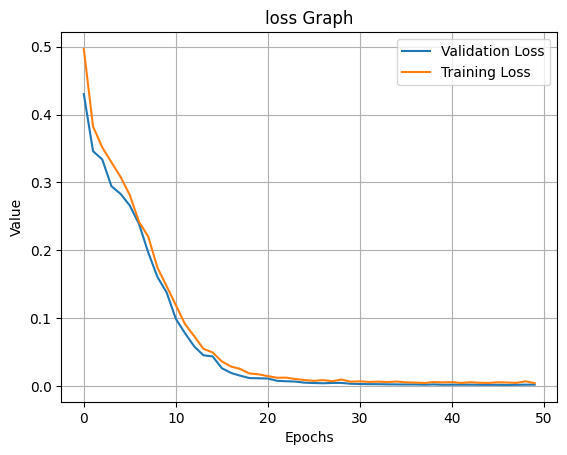

In [24]:
import matplotlib.pyplot as plt


# plt.plot(hist_hype.history['train_loss'])
# plt.plot(hist_hype.history['val_loss'])
# plt.title('Accuracy graph')
# plt.xlabel('epochs')
# plt.ylabel('accuracy')
# plt.legend(['train','test'])
# plt.grid()
# plt.show()

plt.plot(val_loss1, label='Validation Loss')
plt.plot(train_loss1, label='Training Loss')
plt.title('loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import torch
from torchvision.utils import save_image

# 학습된 모델 로드
checkpoint = torch.load('best_model.pth')
encoder.load_state_dict(checkpoint['encoder_state_dict'])
decoder.load_state_dict(checkpoint['decoder_state_dict'])

# 디코더를 평가 모드로 설정
encoder.eval()
decoder.eval()

# 이미지 데이터를 DataLoader에서 가져오기 (예시로 첫 번째 배치 사용)
data = next(iter(valid_loader))
images, _ = data
images = images.to(device)

# 이미지를 인코더에 통과시켜 잠재 벡터 얻기
with torch.no_grad():
    encoded = encoder(images)

# 잠재 벡터를 디코더에 전달하여 이미지 생성
with torch.no_grad():
    generated_images = decoder(encoded)

# 생성된 이미지를 파일로 저장 또는 화면에 표시
save_image(generated_images, 'generated_images.png')

In [27]:
import torch
from torchvision.utils import save_image
from torchvision import transforms
from PIL import Image

# 학습된 모델 로드
checkpoint = torch.load('best_model.pth')
encoder.load_state_dict(checkpoint['encoder_state_dict'])
decoder.load_state_dict(checkpoint['decoder_state_dict'])

# 디코더를 평가 모드로 설정
encoder.eval()
decoder.eval()

# 원하는 이미지 불러오기
image_path = '001_0027.jpg'  # 원하는 이미지 파일의 경로
desired_image = Image.open(image_path).convert('RGB')

# 이미지를 모델이 예상하는 크기로 변환
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])
desired_image = transform(desired_image).unsqueeze(0).to(device)

# 이미지를 인코더에 통과시켜 잠재 벡터 얻기
with torch.no_grad():
    encoded = encoder(desired_image)

# 잠재 벡터를 디코더에 전달하여 이미지 생성
with torch.no_grad():
    generated_image = decoder(encoded)

# 생성된 이미지를 파일로 저장 또는 화면에 표시
save_image(generated_image, 'image1.png')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


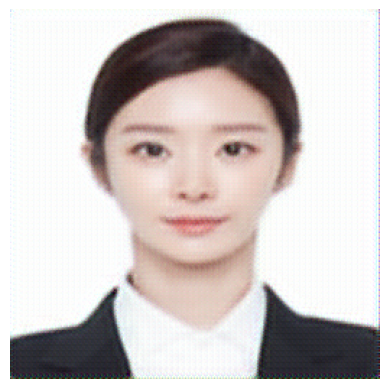

In [28]:
import torch
from torchvision.utils import save_image
from torchvision import transforms
from PIL import Image

# 학습된 모델 로드
checkpoint = torch.load('best_model.pth')
encoder.load_state_dict(checkpoint['encoder_state_dict'])
decoder.load_state_dict(checkpoint['decoder_state_dict'])

# 디코더를 평가 모드로 설정
encoder.eval()
decoder.eval()

# 원하는 이미지 불러오기
image_path = '001_0002.jpg'  # 원하는 이미지 파일의 경로
desired_image = Image.open(image_path).convert('RGB')

# 이미지를 모델이 예상하는 크기로 변환
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])
desired_image = transform(desired_image).unsqueeze(0).to(device)

# 이미지를 인코더에 통과시켜 잠재 벡터 얻기
with torch.no_grad():
    encoded = encoder(desired_image)

# 잠재 벡터를 디코더에 전달하여 이미지 생성
with torch.no_grad():
    generated_image = decoder(encoded)

# 생성된 이미지를 파일로 저장 또는 화면에 표시
save_image(generated_image, 'image1.png')

# 시각화된 이미지를 텐서에서 넘파이 배열로 변환
generated_image_np = generated_image.squeeze().permute(1, 2, 0).cpu().numpy()

# 이미지를 표시
plt.imshow(generated_image_np)
plt.axis('off')
plt.show()


# 실습 과제

위 실습을 응용하여 **본인만의 데이터셋**을 구성하고 학습이 진행됨을 보이시오.

과제에 포함할 내용:

 - 총 4개 이상의 클래스를 분류하는 문제(classification)를 해결
 - 데이터셋에 맞추어 생성한 csv 파일을 다운받아 직접 내용을 검토
 - 학습이 잘되는지 확인
